In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
color = ["red", "orange", "lawngreen", "violet", "seagreen", "darkorange", "lightseagreen", "gold", "palevioletred"]
plt.style.use("bmh")


#### Import data from excel file

In [2]:
df = pd.read_excel("data.xlsx")
print(df)

         X      Z
0    0.500  2.150
1    4.325  2.225
2    8.545  3.192
3   13.180  4.533
4   17.830  6.291
5   21.150  7.146
6   24.480  7.575
7   28.160  7.263
8   32.395  6.147
9   36.150  4.658
10  42.595  2.572
11  49.000  2.160


#### Create band matrix

In [3]:
A = np.zeros((len(df), len(df)))
A[0][0:2] = [2, 1]
for row, column in zip(range(1, len(df)-1, 1), range(0, len(df))):
    A[row][column:column+3] = [1, 4 , 1]
    row +=1
    column += 1
A[len(df)-1][len(df)-2:len(df)] = [1, 2]
print(A)

[[2. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 4. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 4. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 4. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 4. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 4. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 4. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 4. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 4. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 4. 1. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 4. 1.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 2.]]


#### Create geomatric matrix

In [4]:
B = np.zeros((12, 2))
B[0] = np.dot(3,[df["X"][1]-df["X"][0], (df["Z"][1]-df["Z"][0])])
for point in range(2, len(df)):
    point = len(df)+1-point
    B[point-1][0:2] = np.dot(3,[df["X"][point]-df["X"][point-2], (df["Z"][point]-df["Z"][point-2])])
B[len(df)-1] = np.dot(3,[df["X"][len(df)-1]-df["X"][len(df)-2], (df["Z"][len(df)-1]-df["Z"][len(df)-2])])
print(B)

[[ 11.475   0.225]
 [ 24.135   3.126]
 [ 26.565   6.924]
 [ 27.855   9.297]
 [ 23.91    7.839]
 [ 19.95    3.852]
 [ 21.03    0.351]
 [ 23.745  -4.284]
 [ 23.97   -7.815]
 [ 30.6   -10.725]
 [ 38.55   -7.494]
 [ 19.215  -1.236]]


#### Calculate tangent vector matrix

In [5]:
T = np.dot(np.linalg.inv(A), B)
print(T)

[[ 3.74184012 -0.14944448]
 [ 3.99131976  0.52388896]
 [ 4.42788083  1.17988866]
 [ 4.86215691  1.68055642]
 [ 3.97849152  1.39488566]
 [ 3.13387703  0.57890093]
 [ 3.43600038  0.14151063]
 [ 4.15212144 -0.79394346]
 [ 3.70051384 -1.24973681]
 [ 5.0158232  -2.02210932]
 [ 6.83619337 -1.38682591]
 [ 6.18940331  0.07541295]]


#### Probe radius compensation

In [6]:
radius = 1
radius_compensation_matrix = np.zeros((len(df), 2))
for point in range(0, len(radius_compensation_matrix), 1):
    normal_vector = np.multiply(T[point], np.array([0, 1]))
    print(normal_vector)
    unit_normal_vector = normal_vector * (1/np.sqrt(normal_vector[0]**2 + normal_vector[1]**2))
    radius_compensation_matrix[point] = np.array([df["X"][point], df["Z"][point]])-np.dot(unit_normal_vector,radius)
print(radius_compensation_matrix)

[ 0.         -0.14944448]
[0.         0.52388896]
[0.         1.17988866]
[0.         1.68055642]
[0.         1.39488566]
[0.         0.57890093]
[0.         0.14151063]
[ 0.         -0.79394346]
[ 0.         -1.24973681]
[ 0.         -2.02210932]
[ 0.         -1.38682591]
[0.         0.07541295]
[[ 0.5    3.15 ]
 [ 4.325  1.225]
 [ 8.545  2.192]
 [13.18   3.533]
 [17.83   5.291]
 [21.15   6.146]
 [24.48   6.575]
 [28.16   8.263]
 [32.395  7.147]
 [36.15   5.658]
 [42.595  3.572]
 [49.     1.16 ]]


#### Plot Curve

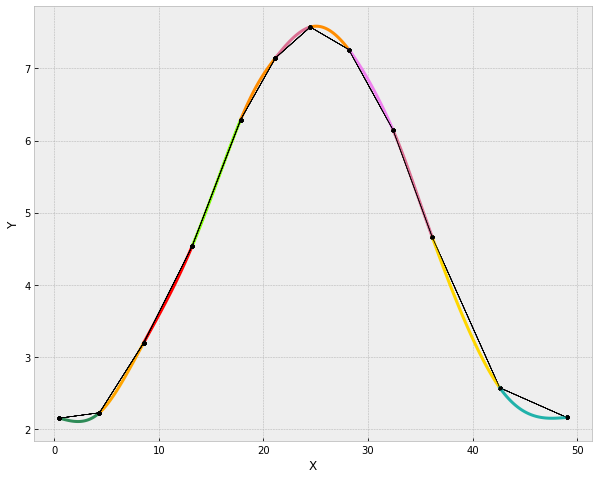

In [7]:
points_num = 41
fig = plt.figure(figsize=(10, 8)).add_subplot()
for i in range(0, len(df)-1, 1): 
    u = 0
    pointsX = []
    pointsY = []
    boundary_condition = np.array([[df["X"][i], df["Z"][i]],[df["X"][i+1], df["Z"][i+1]],T[i],T[i+1]])
    for point_num in range(0, points_num):
        f1_u = 1 - 3*(u**2) + 2*(u**3)
        f2_u = 3*(u**2) - 2*(u**3)
        f3_u = u - 2*(u**2) + (u**3)
        f4_u = -(u**2) + u**3
        blending_function = np.array([f1_u, f2_u, f3_u, f4_u])
        u = u + 1/(points_num-1)
        pointsX.append(np.dot(blending_function, boundary_condition)[0])
        pointsY.append(np.dot(blending_function, boundary_condition)[1])
    plt.plot(pointsX, pointsY, color=random.choice(color), lw=3)
    plt.plot(df["X"], df["Z"], marker=".", color="black", lw=0.5)
plt.xlabel("X")
plt.ylabel("Y")
plt.show()
